<!--
    #----------------------------------------------------------------------------
    # Created By   : Adrià Blanco Culla
    # Maintained By: Miquel Montero Torralbo
    # Last Update  : 2022-05-10. (YYYY-MM-DD).
    # version ='1.0'
    # ---------------------------------------------------------------------------
-->

## Binomial asset-pricing model  

The purpose of this article is to concisely develop a multiperiod binomial asset-pricing model in order to price derivative securities, in particular, vanilla options. To begin with, a brief description of the model is given, so one has the necessary intuition to use properly the Python functions that yield the option theoretical fair price. Then, it is shown how the analytical formulas derived before describe the different vanilla options' dynamics in the market. Finally, the reader is proposed to complete a test in order to assess whether he understood the most important ideas in this article.

## 1. Efficient market theory

**Efficient market hypothesis assumes that investors act as perfectly rational agents**. Therefore, it claims that assets trading in the market are never overvalued or undervalued, since all the relevant information prices in as soon as it becomes publicly available. In other words, it states that the only mechanism to outperform the bond is to take risk, and that the only mechanism to beat an index (e.g., Standard and Poor's 500, or simply S&P 500, a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States) is to take even more risk than the one of a portfolio that is built according to a stock index composition (passive management). The more money you want to make, the riskier must be your bet. 

Thus, in an **efficient market**, if you want to make money you need to be willing to lose money: **arbitrage is excluded**. Arbitrage is a trading strategy that has zero probability of losing money and a positive probability of making money. Furthermore, if all the available information is already considered by the market, **market prices are unpredictable**. 

In our **binomial model**, we will assume that the **no-arbitrage condition** holds, since it is eliminated very quickly by investors when it appears (e.g., differences in stock prices between exchange markets). Although insider information may provide arbitrage opportunities, those cases are out of the scope of this article and may be considered criminal offenses (e.g., knowledge of the price offered in a takeover bid before ir becomes public). The no-arbitrage condition resembles the Lenz's law in Physics, or le Chatelier principle in Chemistry: when a system in equilibrium (e.g., options trading at its no-arbitrage price) is perturbed, it reacts in order to come back to equilibrium. 

According to market prices unpredictability, we will consider **stock price** as a random variable whose **value depends on the result of a coin toss in each time step**. 

##  2. One-period binomial model 

Firstly, we consider the simplest binomial model: 

<img src="./oneperiod.png" alt="Oneperiod" width="240"/>

(This image has been taken from "Stochastic Calculus for Finance I", by Steven Shreve.)

Here, **$S_{0}$** is the **stock price per share at time zero**. We assume that the stock price can ony take two values at time one, depending on a coin toss: 

1. if the coin toss results in **Heads($H$)**, which may occur with a probability $p$, the stock price at time one will be: $S_{1} = S_{0}u$. 


2. if coin toss results in **Tails($T$)**, which may occur with a probability $q = 1 - p$, the stock price will be: $S_{1} = S_{0}d$.


Then, we can define the **up factor and the down factor** as follows: 

$$ u\equiv \frac{S_{1}(H)}{S_{0}} \quad and \quad  \quad d \equiv \frac{S_{1}(T)}{S_{0}}.$$

In time-continuous models, those magnitudes are closely related to market volatility, $\sigma$. By definition, $\sigma$ is a statistical parameter, so it cannot be assessed precisely, but only estimated considering information from the past. Therefore, those **volatility factors need to be provided to the model**.

Now, we define the **no-arbitrage condition** mathematically: 

$$d<1+r<u   \leftrightarrow  \frac{S_{1}(T)-S_{0}}{S_{0}}<r<\frac{S_{1}(H)-S_{0}}{S_{0}}. $$ 

Note that the right-hand side inequalities show a very clear message: the **risk-free interest rate ($r$) is not guaranteed**.

In our model, we consider that there is a **money market that yields a profitability $r$ per period without risk** (e.g., U.S. Treasury Bonds). We assume that this interest rate is the **same for investing (lending) and borrowing**: $1\,\$ $ invested at time zero will yield $(1+r)\, \$ $ at time one, while $1\, \$ $ borrowed from the money market at time zero will results in a debt of $(1+r)\, \$ $ at time one. It is almost always true that $r\geq 0$, but the math only requires $r>-1$. Note that $r<0$ means that you are paid for borrowing money (or have to pay for lending money).


## 3. Option pricing theory

The question we want to answer is the following: **how much is an option worth at time zero before we know whether the coin toss results in heads or tails?**

The approach to find the answer consists of **replicating the option by trading in the stock and money market**. That is, we will set a portfolio that hedges our risk (we issue the option) at and before maturity. For simplicity, we will develop our model using a **European call option**, but the **equations can be easily adapted to encompass** European puts options, as well as American calls or puts. 

In addition, we will consider the **pay-off of a vanilla option**: we have the obligation to pay an amount of money equal to ($S_n-K$) to the option holder if the stock price $S_n$ is above the strike $K$ at maturity, $(S_{n} - K)^{+}$.

**1.** Consider issuing the option and selling it for $V_{0}$ (that is what we call the **option premium**), which is the value of the option contract at time zero. 

Our problem is to determine $V_0$ univocally. To do so, we set a portfolio with the money obtained in the sale to hedge our position: if the stock price exceeds the strike price at maturity, the option holder will execute the option and we will have to pay him the difference, $S_1-K$. Therefore, by construction: $\Pi_0 = V_0$.

**2.** Let us buy $\delta_{0}$ shares of a stock.

Consequently, our cash position at **time zero** is: 

$$B_{0} = V_{0} - \delta_{0}S_{0}. $$

However, at **time one** our cash position is:

$$B_{1} = (1+r)(V_{0} - \delta_{0}S_{0}).$$

Meanwhile, the value of our portfolio is, 

i)$$  \Pi_{1}(H) = \delta_{0}S_{1}(H) + (1+r)(V_{0} - \delta_{0}S_{0}) \quad or\quad  \Pi_{1}(T) = \delta_{0}S_{1}(T) + (1+r)(V_{0} - \delta_{0}S_{0}). $$ 

In either case we want to choose $\delta_{0},V_{0}$ so that $$\Pi_{1} = V_{1} = (S_{1} - K)^{+}.$$ 

Here we have imposed that our portfolio hedges our **contingent** payoff. Note that if the stock price does not reach the option **strike price $K$**, the option will expire worthless at time one (maturity). This fact is summarized in the superindex $+$.

**3.** We rearrange the previous formulas and solve the following equations with $\delta_{0},V_{0}$ as unknowns: 

$$\begin{alignat*}{4}
V_{0} & {}+{} &  \delta_{0}\left(\frac{1}{1+r}S_{1}(H)-S_{0}\right)  &  ={} & \frac{1}{1+r}V_{1}(H), \\
V_{0} & {}+{} &  \delta_{0}\left(\frac{1}{1+r}S_{1}(T)-S_{0}\right)  &  ={} & \frac{1}{1+r}V_{1}(T). \\
\end{alignat*}$$

One way to solve these equations is to multiply the first equation by $\widetilde{p}$ and the second by $\widetilde{q} = 1 - \widetilde{p}$ and then add them. This procedure yields: 

$$\begin{alignat*}{1}
V_{0} + \delta_{0}\left(\frac{1}{1+r}\left[\widetilde{p}S_{1}(H)+\widetilde{q}S_{1}(T)\right]   -S_{0}\right) &  ={} & \frac{1}{1+r}\left[\widetilde{p}V_{1}(H)+\widetilde{q}V_1(T)\right].
\\
\end{alignat*}$$

**4.** We can choose $\widetilde{p}$ and $\widetilde{q}$ so that the term containing $\delta_{0}$ vanishes, since they are free parameters introduced for convenience (as we have two equations and two unknowns, we could already find a unique solution):

ii)$$ S_{0} = \frac{1}{1+r}\left[\widetilde{p}S_{1}(H)+\widetilde{q}S_1(T)\right] \leftrightarrow  \widetilde{p} = \frac{1
+r-d}{u-d} \quad and \quad \widetilde{q} = \frac{u-(1+r)}{u-d}. $$

See that this sets a very clear interpretation of $\widetilde{p}$ and $\widetilde{q}$: apart from being considered as a mathematical trick to solve the equations, they should be understood as the **risk-neutral probabilities**. That is, the probabilities associated to the coin toss resulting in heads and tails, respectively, under which the **rate of growth of the stock equals the risk-free interest rate**. 

Note that $\widetilde{p}$ and $\widetilde{q}$ are not the **actual probabilities**, which we denoted before as $p$ and $q$. Otherwise, no one would want to incur the risk associated with investing in stocks, since it would be as profitable as investing in the money market. Hence, 

$$S_{0} < \frac{1}{1+r}\left[pS_{1}(H)+qS_1(T)\right].$$

**5.** Finally, the solution for the system of equations yields: 

iii) **Delta hedging formula**

$$ \delta_{0} = \frac{V_1(H)-V_1(T)}{S_1(H)-S_1(T)}. $$

This formula tells us how many shares we have to buy at time zero if we want to hedge our short position in the call option.

iv) **No-arbitrage option price at time zero**

$$V_{0} = \frac{1}{1+r}\left[\widetilde{p}V_{1}(H)+\widetilde{q}V_1(T)\right].$$

It is important to remark that in case that the call-option issuer was able to sell it for $V'_0>V_0$, he could buy $\delta_0$ shares and hedge his short position, while investing the remaining $V'_0-\delta_0S_0>0$ in the money market: he would be doing arbitrage. Likewise, if the option holder was able to buy the option for $V''_0<V_0$, he could sell short $\delta_0$ shares, use this money to buy the option for $V''_0$ to hedge his position, and invest the remaining $\delta_0S_0-V''_0>0$ to invest in the money market, having the certainty of being able to pay off his debt while having a positive probability of making money. Thus, in a **complete market, every derivative security has a unique price that precludes arbitrage**. A **market is complete** when the **replicating portfolio does always exist**, no matter the contigent payoffs submitted. 

Note that $V_0$ does not depend on $p$ or $q$, but depends on $u$ and $d$. The analogous fact for time continuous models is that **prices of derivative securities depend on the corresponding volatilities, but not on their mean rates of growth**. 

## 4. Multiperiod binomial model

<img src="multiperiod.png" alt="Multiperiod" width="600"/>
(This image has been taken from "Stochastic Calculus for Finance I", by Steven Shreve.)

Following and analogous procedure to the developed in the previous section for every time step, one can derive recursively: 

i) **Wealth equation**  

$$\Pi_{n+1}(w_1\cdots w_{n+1}) = \delta_{n}S_{n+1}(w_1\cdots w_{n+1}) + (1+r)[\Pi_{n}(w_1\cdots w_{n}) - \delta_{n}(w_1\cdots w_{n})S_{n}(w_1\cdots w_{n})],$$ 

where $w_1\cdots w_{n+1}$ refers to the outcome of the coin tosses from the first period to the $n+1$.

ii) **Stock price formula**

$$S_{n}(w_1\cdots w_n) = \frac{1}{1+r}\left[\widetilde{p}S_{n+1}(w_1\cdots w_nH)+\widetilde{q}S_{n+1}(w_1\cdots w_nT)\right].$$

That is, the stock price is the discounted risk-neutral average of the price at the following period.

iii) **Delta hedging formula**

 $$\delta_{n}(w_1\cdots w_n) = \frac{V_{n+1}(w_1\cdots w_{n}H)-V_{n+1}(w_1\cdots w_{n}T)}{S_{n+1}(w_1\cdots w_{n}H)-S_{n+1}(w_1\cdots w_{n}T)}.$$

iv) **No-arbitrage option price**

$$V_{n}(w_1\cdots w_n) = \frac{1}{1+r}\left[\widetilde{p}V_{n+1}(w_1\cdots w_nH)+\widetilde{q}V_{n+1}(w_1\cdots w_nT)\right].$$

Obviously, the portfolio value and the option payoff continue to agree at maturity: 

$$\Pi_N(w_1\cdots w_N) = V_N(w_1\cdots w_N) = (S_N - K)^{+}.$$

Note that stock and option prices formulas depend on $\widetilde{p}$ and $\widetilde{q}$. Given that $u$ and $d$ appear both in $\widetilde{p}$ and $\widetilde{q}$ formulas, **we can assume $u=1/d$ without losing generality**. Consequently, **recursive formulas for price and derivative prices form trees, which we can understand as unidimensional random walks, eventually**. 

It is important to remark that in this model there are three different **stochastic processes**: $\delta_0,\dots, \delta_n; \Pi_0,\dots, \Pi_{n+1}$; and $V_0,\dots, V_{n+1}$. In order to study them with a more accurate and general approach, we need to introduce some new probability mathematics. Our description here will be very brief and simple, for further detail you can check Chapter 2 of "Stochastic Calculus for Finance I", by Steve Shreve. 

### 4.1 Conditional expectations

From elementary probability theory, we define the **sample space**, in our case, it may be the set of all possible outcomes when we toss a coin three times: $\Omega = \{HHH,HHT,HTH,HTT,THH,THT,TTH,TTT\}$.

We assume that **tosses are independent**, so probability factorizes: $P(HHH)=P(H)P(H)P(H)=p^{3}$. Therefore, if we define an **event** as a **subset of the sample space**, for example, the first toss resulting in head: $P(w_1 = H) = P(HHH)+P(HHT)+P(HTH)+P(HTT)=···=p$. Note that we can define a function that assigns a real number to each event: a random variable.

Moreover, we define **conditional probability** as follows: 

$$P(A|B) = \frac{P(A\cap B)}{P(B)}. $$

That is, the probability of an event $A$ ocurring given the ocurrence of event $B$ equals the probability of $A$ and $B$ happening divided by the probability of $B$. In our case, $A$ and $B$ define random variables that assign a real number to each event so that one can compute a probability (which will depend on the probabilty measure) for these quantities. 

From here, we can define the conditional expectation of $A$ given $B$: 

$$E(A|B) = \sum_{i=1}^{N}a_i P(A=a_i|B).$$

In our model binomial model $A$ relates to  $n+1,\dots , N$ coin toss results and $B$ refers to the first $n$ coin tosses. Then, the conditional expectation in our coin-toss space is: 

$$\widetilde{E}_n[A] =\sum_{w_{n+1}\cdots w_{N}}a_i\widetilde{p}^{\# H}\widetilde{q}^{\# T}, $$

where $\#H$ and $\#T$ are the number of heads and tails from the $n+1$ toss to the last one, respectively. Note the the subindex $n$ refers to the current time step. In other words, this is the expectation of $A$ given the coin cosses until time $n$.

From now on, in order to keep a concise notation, we will elude the explicitation of the depence of the random variables on the coin tosses. Note that **we can define conditional expectations using different probability measures: $P$ or $\widetilde{P}$**.  These two probability measures give different weights to the asset-price paths in the model. They **agree**, however, on which price paths are possible (**which paths have positive probability of occurring**); they **disagree only on what these positive probabilities are**. The **real-world probabilities are the associated to measure $P$**. The risk-neutral probabilities $\widetilde{P}$ are a fictitious but helpful construct because they allow us to neatly summarize the result of solving systems of equations.

See that the **limit cases for conditional expectations** are: 

- Conditional expectation of $A$ based on no information is the expectation: $\widetilde{E}_0 [A] = E[A] = \displaystyle\sum_{w \in \Omega}A(w)P(w)$.
- Conditional expectation of $A$ based on all coin tosses is $A$: $\widetilde{E}_N[A] = A$.

We can regard conditional expectations as random variables that hold the following properties: 

- Linearity: $E_n[c_1 A + c_2 B] = c_1 E_n[A]+c_2 E_n[B]$.
- Taking out what is known: if $A$ depends only on the first $n$ coin tosses $\rightarrow E_n[AB] = AE_n[B]$.
- Iterated conditioning: if $0\leq n < m \leq N \rightarrow E_n[E_m[A]] = E_n[A]$.
- Independence: if $A$ depends only on $n+1,\cdots ,N$ tosses $\rightarrow E_n[A] = E[A]$. 
- Conditional Jensen's inequality: if $\phi(x)$ is a convex function of $x \rightarrow E_n[\phi (x)] \geq \phi (E_n[A])$. 

### 4.2 Martingales

See that we can rewrite our **stock price formula ii)** using conditional expectation. Dividing by $(1+r)^{n}$ both sides: 
$$\frac{S_n}{(1+r)^{n}} = \widetilde{E}_n\left [\frac{S_{n+1}}{(1+r)^{n+1}}\right ].$$

Under risk-neutral measure, for a stock that pays no dividend, the best estimate based on the information at time $n$ of the discounted stock price at time $n+1$ is the discounted price at time $n$. Processes that satisfy this condition are called **martingales**. In other words, a stochastic process is a martingale when the **conditional expectation of the next value of the random variable, given all the previous values, is the present value**. 

Using the iterated conditioning property of conditional expectations, one can generalise the martingale property: for $0\leq n \leq m \leq N$, 

$$M_n = E_n[M_m].$$  

where $M_n$ depends only on the first $n$ coin tosses and, hence, $M_0,M_1,\dots ,M_N$ is an adapted stochastic process. This can be called **martingale multistep property**.

It is important to remark that the **expectation of a martingales is constant**: $M_0 = E[M_n]$. Therefore, **martingales have no tendency to rise or fall, but to stay stable**.

Stock prices should rise, on average, faster than the money market interest in order to compensate investors for the risk. Hence, in **real markets (under $P$ measure) discounted stock prices are submartingales**: $M_n \leq E_n[M_{n+1}]$. Conversely, **under the risk-neutral measure, discounted stock prices are martingales**, since the stock rate of growth equals the risk-free interest rate. That is, under the risk-neutral measure, stocks grow like bonds.

In a binomial model with $N$ coin tosses, an investor buys $\delta_n$ shares at time $n$ and rebalances his position to $\delta_{n+1}$ shares at time $n+1$. The portfolio rebalancing at each step is financed by investing or borrowing, as necessary, from the money market. Thus, $\delta_n$ depends only on the first $n$ tosses, so **$\delta_0,\dots ,\delta_n$ is an adapted stochastic process**. The **same happens with the portfolio value, which follows the wealth equation i)**.

Now we ask a question that has two possible answers: which is the average growth of the investor's wealth? Under $P$ measure, the average growth depends on the specific portfolio process, that is, on the coin tossing. Nonetheless, under $\widetilde{P}$, the portfolio is irrelevant, since the average rate of growth equals the risk-free interest rate. 

Consequently, **discounted wealth process is a martingale under the risk-neutral probability $\widetilde{P}$**:

$$\frac{\Pi_n}{(1+r)^{n}} = \widetilde{E}_n\left [\frac{\Pi_{n+1}}{(1+r)^{n+1}}\right ] = \widetilde{E}_n\left [\frac{\Pi_{N}}{(1+r)^{N}}\right ],$$

where we used the multistep property of martingales. 

As we stated before, expected value of a martingale is constant:

$$\widetilde{E}\left[\frac{\Pi_n}{(1+r)^{n}}\right] = \Pi_0.$$

In general, **if we can find a risk-neutral measure in a model** (i.e., a measure that agrees with the actual probability measure about which price paths have zero probability, and under which the discounted prices of all primary assets are martingales),then **there is no arbitrage in the model**. This is sometimes called the **First Fundamental Theorem of Asset Pricing**. The essence of its proof is contained in the preceding paragraph: under a risk-neutral measure, the discounted wealth process has constant expectation. Consequently, it cannot begin at zero and later be strictly positive with positive probability unless it also has a positive probability of being strictly negative. 

We have learnt that **there is an initial wealth $\Pi_0$ and a replicating portfolio process $\delta_0,\cdots ,\delta_{N-1}$ that generates a wealth process $\Pi_1,\cdots ,\Pi_N$ satisfying $\Pi_N = V_N $ no matter the coin tossing outcome**. Then, 

$$\frac{\Pi_n}{(1+r)^{n}} = \frac{V_n}{(1+r)^{n}} = \widetilde{E}_n\left [\frac{\Pi_{N}}{(1+r)^{N}}\right ] = \widetilde{E}_n\left [\frac{V_{N}}{(1+r)^{N}}\right ],$$

what yields the **risk-neutral pricing formula** in terms of the option payoff at maturity: 

$$\frac{V_n}{(1+r)^{n}} = \widetilde{E}_n\left [\frac{V_{N}}{(1+r)^{N}}\right ].$$

Furthermore, it is important to remark that, **in addition to discounted stock prices and portfolio value, option prices are martingales under $\widetilde{P}$**: 

$$\frac{V_n}{(1+r)^{n}} = \widetilde{E}_n\left [\frac{V_{n+1}}{(1+r)^{n+1}}\right ].$$

### 4.3 Markov processes 

A **Markov process** is special stochastic process where the **probability of an event ocurring depends only on the probability of the event ocurring immediately before**. This feature of having a **short-term memory** is called **Markov property**, in contrapostion to **independent events**, which have **no memory at all**. 

Mathematically: 

if for $0\leq n \leq N-1$, arbitrary $f(x)$ and $g(x)$ depending on $n$ and $f$ (with $x$ being a dummy variable) holds 

$$E_n[f(X_{n+1})]=E[f(X_{n+1})|X_n,X_{n-1},\dots] = g(X_n).$$

we say $X_0, X_1,\dots, X_N$ is a Markov process with $X_n$ being a random variable at time $n$.

Note that the **martingale property is a special case of the Markov property** with $f(x) = x$ and $g(x) = x$.

Essentially, the **Markov property** says that $V_n$  dependence on coin tosses occurs through $S_n$, what means that **there is a version of the derivative security pricing algorithm in which we do not need to store path information**. This is the one we use in our code below, since it is much more efficient computationally. 

In the binomial model, $S_{n+1}$ can be either $S_{n}u$ or $S_{n}d$. Hence, $g(S_n) = pf(uS_n)+qf(dS_n)$. That means that **the stock price is a Markov process on both $P$ and $\widetilde{P}$, although it is only a martingale under $\widetilde{P}$**. However, if $pu+qd=1$ it is a martingale under both probability measures, too.



## 5. Option pricing code

So far, for the sake of simplicity, option maturity has been identified with the number of time periods, $N$.  However, this does not need to be always true. This depends on how one discretizes time,

$$\Delta t = \frac{T}{N},$$

where $T$ is the option maturity (note that we do not need to speak about heads and tails any more), $N$ is the number of time periods and $\Delta t$ is the **size of the time step** corresponding to one period. 

Therefore, the discounting factor composed for $N \rightarrow \infty$ periods becomes: 

 $$\left(\frac{1}{1+r \Delta t}\right)^{N} =  \left(\frac{1}{1+r \frac{T}{N}}\right)^{N} \longrightarrow  e^{-r\Delta tN} =  e^{-rT}. $$

That is the time-continuous discounting factor that appear in time-continuous models. 

Moreover, for simplicity, we can define 

$$ u = 1/d= e^{\sigma \sqrt{\Delta t}}, $$

where **$\sigma$ is the annualized volatility of the underlying asset**: recall the definition of the log-return, $X_n = \ln(S_{n+1}/S_n)$, and observe how

$$E[X^2_n|S_n]=\widetilde{E}[X^2_n|S_n]= \sigma^2 \Delta t.$$

Therefore, as long as $\Delta t$ is small enough, $\sigma^2$ coincides with the (annualized) standard deviation of returns **under both $P$ and $\widetilde{P}$**. 

Note that from now on, **$u$ is the upside factor for each time period**. For example, if one sets $T=1\,$ (year) and $N=12$, $u$ will be the monthly upfactor of the underlying. We will see that **the smaller is $\Delta t$, the closer binomial model results are to the Black-Scholes formula**.



Now run the code cell below to activate the functions that we will use in this notebook. The ``parameters()`` function will ask you to set the parameters needed by the model to work: 

**Parameters** that define the **binomial model**:
- **Number of time periods** of the binomial model, **$N$**. You must write a **natural number**, otherwise the code will take $N = 12$ as default.
- **Annualized risk-free interest rate**, **$r$**. You must write a **real number using dots** so that **$r>-1$**, otherwise the code will take $r = 0.1$ as default. 
- **Annualized volatility**, **$\sigma$**. You must write a **positive real number**, usually $0<\sigma<1$. Recall that no-arbitrage condition needs to hold, **$d<1+r<u$**. Otherwise, the code will take $\sigma = 0.1 $, so $u = 1.029$ and $d = 0.972$ as default. 
- **Initial stock price**, **$S_0$**. You should write a **positive real number**, otherwise the code will take $S_0 = 10\,\$ $ as default.

**Parameters** that define the **option**:
- **Maturity in years** of the option, **$T$**. You must write a **positive real number**, otherwise $T = 1$ will be taken as default.  
- **European or American**. Write **e** or **a**, respectively. Otherwise the code will take European as default. 
- **Call or Put**. Write **c** or **p**, respectively. Otherwise, the code will take Call as default. 
- **Strike price**, **$K$**. Write a **positive real number**, in dollars. Otherwise the code will take $K = 5 \$ $ as default. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
def parameters(): 
    '''
    Asks through keyboard for the parameters needed and checks if the values given are valid for the binomial model to work.
    
    INPUTS: 
    
    None
    
    OUTPUTS: 
    
    T = option maturity 
    N = binomial iterations
    r = annual free-risk interest rate 
    sigma = annual stock volatility
    S0 = initial stock price
    opttype1 = American or European
    opptype2 = Call or Put 
    K = strike price
    
    '''
    
    global T,N,r,u,S0,opttype1,opttype2,K,sigma,dt
    options1 = ['A','a','E','e']
    options2 = ['C','c','p','P']
    try: 
        T = float(input('T: '))
        while not T>0:
            T = float(input('T>0: '))
        N = int(input('N: '))
        while not N>0:
            N = float(input('N>0: '))
        dt = T/N
       
        r = float(input('r: '))
        while not r>-1: 
            r = float(input('Remember that r > -1:')) 
        
        sigma = float(input('sigma: '))
        while not T>0:
            sigma = float(input('sigma>0: '))
        u = np.exp(sigma*np.sqrt(dt))
        d = 1/u
        while not d<1+r<u:
            print('Remember that no-arbitrage condition needs to hold: d<1+r<u ')
            T = float(input('T: '))
            N = int(input('N: '))
            dt = T/N
            r = float(input('r: '))
            sigma = float(input('sigma: '))
            u = np.exp(sigma*np.sqrt(dt)) 
            d = 1/u
       
        S0 = float(input('S0: '))
        opttype1 = str(input('European or American: '))
        
        if opttype1 not in options1: 
            print('WARNING: some parameters have taken default values.')
            opttype1 = 'E'
       
        opttype2 = str(input('Call or Put: '))
        
        if opttype2 not in options2: 
            print('WARNING: some parameters have taken default values.')
            opttype2 = 'C'
        
        K = float(input('K: '))
    #in case there is a ValueError it takes default values
    except: 
        print('WARNING: some parameters have taken default values.')
        N = 12
        r = 0.1
        sigma = 0.1
        S0 = 10
        T = 1
        opttype1 = 'E'
        opttype2 = 'C'
        K = 5
    return T,N,r,u,S0,opttype1,opttype2,K,sigma,dt

#-------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

def binomial_model(T,N,S0, sigma, r, K,option_type1,option_type2):
    """
    Returns the option and stock prices for each node and the premium : option[0][0] in the code 
   
    INPUTS: 
    
    T = option maturity
    N = number of binomial iterations
    S0 = initial stock price
    sigma = annual stock volatility
    r = risk free interest rate per period
    K = strike price
    option_type1 = European or American 
    option_type2 = Call or Put
    
    OUTPUTS:
    
    V0 = option premium
    option = option price matrix that represents the binomial tree
    stock = stock price matrix that represents the binomial tree
    dead_time = list of time steps corresponding to nodes where American options are executed
    dead_ option = list of option prices corresponding to nodes where American options are exercised
    dead_stock = list of stock prices corresponding to nodes where American options are exercised
    
    """
    global option,stock,dead_time, dead_option, dead_stock
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (1 + r*dt - d) / (u - d)
    q = 1 - p
    dead_time = []
    dead_option = []
    dead_stock = []
    
    # make stock price tree
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Generate option prices recursively
    option = np.zeros([N + 1, N + 1])
    
    #call payoff
    if option_type2 == 'c' or option_type2 == 'C':
        option[:, N] = np.maximum(np.zeros(N + 1), (stock[:, N] - K)) 
    #put payoff
    elif option_type2 == 'P' or option_type2 == 'p':
        option[:, N] = np.maximum(np.zeros(N + 1), (K - stock[:, N]))
    
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (
                1 / (1 + r*dt) * (p * option[j, i + 1] + q * option[j + 1, i + 1])) 
            
            if option_type1 == 'A' or option_type1 == 'a':
                #american puts
                if option_type2 == 'P' or option_type2 == 'p':
                    option[j,i] = np.maximum(option[j,i], K - stock[j,i])
                    if option[j,i] == K - stock[j,i]:
                        dead_time.append(i*dt)
                        dead_option.append(option[j][i])
                        dead_stock.append(stock[j][i])
                #american calls
                else: 
                    option[j,i] = np.maximum(option[j,i], stock[j,i] - K)
                    if option[j,i] == stock[j,i] - K:
                        dead_time.append(i*dt)
                        dead_option.append(option[j][i])
                        dead_stock.append(stock[j][i])
            else:
                continue     
    return option[0][0] 

#----------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

def tree_plot(T,K,N,opttype1,opttype2,option,stock,dead_time, dead_option, dead_stock):
    '''
    Plots the stock and option price trees showing in which nodes the option is worthless, out-of-the-money,
    in-the-money and exercised.
    
    INPUTS: 
    
    T = option maturity 
    K = strike price
    N = number of iterations
    option_type1 = European or American 
    option_type2 = Call or Put
    option = option price matrix that represents the binomial tree
    stock = stock price matrix that represents the binomial tree
    dead_time = list of time steps corresponding to nodes where American options are executed
    dead_ option = list of option prices corresponding to nodes where American options are exercised
    dead_stock = list of stock prices corresponding to nodes where American options are exercised
    
    OUTPUTS: 
    
    Plots
    
    '''
    timestep = []
    price_stock = []
    price_option = []
    
    zeros = []
    timezero = []
    worthless_money = []
   
    out_money_stock = []
    out_money_option = []
    out_time = []
    
    dt = T/N
    
    for t in range(0,N+1):
        for i in range(0,t+1):
            #worthless nodes 
            if option[i][t] == 0: 
                zeros.append(option[i][t])
                worthless_money.append(stock[i][t])
                timezero.append(t*dt) 
            else: 
                #out-of-the-money calls 
                if opttype2 == 'c' or opttype2 == 'C': 
                    if stock[i][t]<K:
                        out_money_stock.append(stock[i][t])
                        out_money_option.append(option[i][t])
                        out_time.append(t*dt)
                    else: 
                        timestep.append(t*dt)
                        price_stock.append(stock[i][t])
                        price_option.append(option[i][t]) 
                #out-of-the-money puts 
                if opttype2 == 'p' or opttype2 == 'P': 
                    if stock[i][t]>K:
                        out_money_stock.append(stock[i][t])
                        out_money_option.append(option[i][t])
                        out_time.append(t*dt)
                    else: 
                        timestep.append(t*dt)
                        price_stock.append(stock[i][t])
                        price_option.append(option[i][t])

    fig, (ax1, ax2) = plt.subplots(2,sharex = True,gridspec_kw={'hspace': 0})
    plt.xlabel('Time(years)')
    plt.xticks(np.arange(0,T+1,1))
    ax1.set_title('Stock and {} {} Option price trees'.format(opttype1,opttype2))
    ax1.set_ylabel('Price per share($)')
    ax2.set_ylabel('Price per contract($)')
    #stock plot 
    ax1.scatter(timestep, price_stock, color = 'limegreen', label = 'in-the-money')
    ax1.scatter(out_time, out_money_stock, color = 'gold', label = 'out-of-the-money')
    ax1.scatter(timezero, worthless_money, color = 'tomato', label = 'worthless')
    ax1.scatter(dead_time, dead_stock, marker = 'x', color = 'black', label = 'dead')
    ax1.axhline(y = K, color = 'black', linestyle = '--', label = 'strike price')
    ax1.legend(fontsize = 7)
    #option plot 
    ax2.scatter(timestep, price_option, color = 'limegreen', label = 'in-the-money')
    ax2.scatter(out_time, out_money_option, color = 'gold', label = 'out-of-the-money')
    ax2.scatter(timezero,zeros,color = 'tomato', label = 'worthless')
    ax2.scatter(dead_time, dead_option, marker = 'x', color = 'black', label = 'dead')
    
    # this gives the interactivity to the plots
    mplcursors.cursor(hover=True)
    
    plt.show()

#-------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

from scipy.stats import norm
def black_scholes(opttype1,opttype2,S0, K, T, r, sigma):
    '''
    Gives th option premium according to the Black-Scholes formula
    
    INPUTS: 
    
    opttype1 = American or European
    opptype2 = Call or Put 
    S0 = initial stock price
    K = strike price
    T = option maturity 
    r = annual free-risk interest rate 
    sigma = annual stock volatility
     
    OUTPUTS: 
    
    Option payoffs for European Calls and puts
    '''

    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
   
    if opttype1 == 'e' or opttype1 == 'E':
        if opttype2 == 'c' or opttype2 == 'C':
            return S0 * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
        else: 
            return K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)
    else: 
        return
     
#----------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------

def subplots(opttype1,opttype2,S0, K, T, r, sigma,N):
    '''
    Returns different plots which assess how the option premium changes with different model parameters in limit cases.
    
    INPUTS: 
    
    opttype1 = American or European
    opptype2 = Call or Put 
    S0 = initial stock price
    K = strike price
    T = option maturity 
    r = annual free-risk interest rate 
    sigma = annual stock volatility
    N = number of iterations
    
    OUTPUTS:
    
    Four plots: V0(S0/K), V0(dt), V0(T) and V0(r)
    '''
    maturities = []
    V01_binomial = []
    V01_BS = []

    initial_S = []
    V02_binomial = []
    V02_BS = []
    payoff = []

    time_step = []
    V03_binomial = []
    V03_BS = []

    rate = []
    V04_binomial = []
    V04_BS = []
   
    #american puts need much larger T to show a similar behaviour in V0(T)
    if (opttype1 == 'a' or opttype1 == 'A') and (opttype2 == 'p' or opttype2 == 'P'):
        i = 10
    else: 
        i = 1 
    #V0(T)  
    for T1 in range(1,1000*i): 
        maturities.append(T1)
        V01_binomial.append(binomial_model(T1,N,S0, sigma, r, K,opttype1,opttype2))
        V01_BS.append(black_scholes(opttype1,opttype2,S0, K, T1, r, sigma))
    #V0(S0/K)
    for S2 in range(K-50,K+50): 
        initial_S.append(S2/K)
        V02_binomial.append(binomial_model(T,N,S2, sigma, r, K,opttype1,opttype2))
        V02_BS.append(black_scholes(opttype1,opttype2,S2, K, T, r, sigma))
        if opttype2 == 'C' or opttype2 == 'c': 
            if S2<K:
                payoff.append(0)
            else:
                payoff.append(S2-K)
        else: 
            if S2<K:
                payoff.append(K-S2)
            else:  
                payoff.append(0)
    #V0(dt)
    for N3 in range(1,100): 
        time_step.append(T/N3)
        V03_binomial.append(binomial_model(T,N3,S0, sigma, r, K,opttype1,opttype2))
        V03_BS.append(black_scholes(opttype1,opttype2,S0, K, T, r, sigma))
    #V0(r)
    for r4 in np.arange(-0.25,0.5,0.01): 
        rate.append(r4)
        V04_binomial.append(binomial_model(T,N,S0, sigma, r4, K,opttype1,opttype2))
        V04_BS.append(black_scholes(opttype1,opttype2,S0, K, T, r4, sigma))


    fig, axs = plt.subplots(2, 2)

    axs[1, 0].plot(maturities, V01_binomial)
    axs[1, 0].plot(maturities, V01_BS, color = 'orange')
    axs[1, 0].set_title("3- Premium($) [Maturity(years)]")

    axs[0, 0].plot(initial_S, V02_binomial, label = 'Binomial premium')
    axs[0, 0].plot(initial_S, V02_BS, color = 'orange', label = 'Black-Scholes premium')
    axs[0, 0].plot(initial_S, payoff, color = 'black', label = 'Option payoff')
    axs[0, 0].set_title("1- Premium($) [Initial stock price($) / Strike($)]")
    axs[0,0].legend()

    axs[0, 1].plot(time_step, V03_binomial)
    axs[0, 1].plot(time_step, V03_BS, color = 'orange')
    axs[0, 1].set_title("2- Premium($) [Time step(years)]")
    axs[0,1].set_ylim(V03_binomial[2]-0.3,V03_binomial[2]+0.2)

    axs[1, 1].plot(rate, V04_binomial)
    axs[1, 1].plot(rate, V04_BS, color = 'orange')
    axs[1, 1].set_title("4- Premium($) [Annual risk-free interest rate]")

    fig.set_size_inches(9,9)
    return fig.tight_layout()

#------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
import numpy as np
from scipy.stats import norm
def interactive_plot(K,T,r,sigma,opttype2): 
    '''
    Returns an interactive plot where you can study how V0(S0/K) varies with T,r and sigma in comparison to initial payoff
    
    INPUTS: 
    
    K = strike price
    T = option maturity 
    r = annual free-risk interest rate 
    sigma = annual stock volatility
    opttype2 = Call or Put
    
    OUTPUTS: 
    
    Interactive plots
    '''
    fig = plt.figure(figsize=(7, 7))

    # Create main axis
    ax = fig.add_subplot(111)
    fig.subplots_adjust(bottom=0.1, top=0.75)
    
    # Create axes for sliders
    ax_T = fig.add_axes([0.3, 0.92, 0.4, 0.05])
    ax_T.spines['top'].set_visible(True)
    ax_T.spines['right'].set_visible(True)

    ax_r = fig.add_axes([0.3, 0.85, 0.4, 0.05])
    ax_r.spines['top'].set_visible(True)
    ax_r.spines['right'].set_visible(True)

    ax_sigma = fig.add_axes([0.3, 0.78, 0.4, 0.05])
    ax_sigma.spines['top'].set_visible(True)
    ax_sigma.spines['right'].set_visible(True)


    # Create sliders
    s_T = Slider(ax=ax_T, label='T', valmin=0.08, valmax=20, valinit=1, valfmt=' %1.1f years',facecolor='orange')
    s_r = Slider(ax=ax_r, label='r', valmin=-0.05, valmax=0.1, valinit=0.01, valfmt=' %1.2f ', facecolor='orange')
    s_sigma = Slider(ax=ax_sigma, label='sigma', valmin=0, valmax=1, valinit=0.15, valfmt=' %1.2f ', facecolor='orange')

    # Plot initial parameter values
    S0_list = np.linspace(K-50, K+50, 80)
    y = black_scholes(opttype1,opttype2,S0_list, K, T, r, sigma)
    f_d, = ax.plot(S0_list/K, y, linewidth=2.5, label = 'Black-Scholes premium', color = 'orange')


    # Update values
    def update(val):
        T_update = s_T.val
        r_update = s_r.val
        sigma_update = s_sigma.val
        f_d.set_data(S0_list/K, black_scholes(opttype1,opttype2,S0_list, K, T_update, r_update, sigma_update))
        fig.canvas.draw_idle(color = 'orange')

    s_T.on_changed(update)
    s_r.on_changed(update)
    s_sigma.on_changed(update)
    
    #Plot initial payoff
    payoff = []
    for i in range(0,len(S0_list)):
        if opttype2 == 'c' or opttype2 == 'C': 
            if K<S0_list[i]:
                payoff.append(S0_list[i]-K)
            else: 
                payoff.append(0)
        else: 
            if K>S0_list[i]:
                payoff.append(-S0_list[i]+K)
            else: 
                payoff.append(0)
    ax.plot(S0_list/K,payoff, color = 'black', label = 'Option payoff',linewidth=1.5)

    # Set axis labels
    ax.set_xlabel('S0/K')
    ax.set_ylabel('V0 ($)')
    ax.legend()
    plt.show()

#-------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

import random
def test():
    '''
    Asks as much questions as the reader demands randomly and in case of failure provides hints
    
    INPUTS: 
    
    num_questions = number of questions the readers desires to answer
    
    OUTPUTS: 
    
    Number of correct answers and hints
    '''
    num_questions = int(input('How many questions do you want to answer? \n'))
    mistakes = []
    questions1 = ['QUESTION: If an option is in-the-money when the stock price is greater than the strike it is a ____ option.',
                  'QUESTION: If an option is in-the-money when the stock price is lower than the strike it is a ____ option.',
                  'QUESTION: If one can only exercise the option at maturity, it is a ____ option.',
                  'QUESTION: If an option can be exercised at any moment before maturity, it is an _____ option.',
                  'QUESTION: After a thorough study of a company you conclude that its stock may rise considerably in the coming two years, from its current 60$. Consequently, you decide to buy and option with 80$ as the strike, considering that the FED will keep risk-free interest rates at 2%. Historically, the stock has moved up and down by a 3% every month. What premium should you pay for the option? ',
                  'QUESTION: Which strike should have both a call and a European put with equal premiums if they both expire in a year and current underlying asset price is 150$, while interest rates are 3%?', 
                  'QUESTION: Dead nodes typically appear in ____ ____  options.',
                  'QUESTION: You want to be long in a stock but want to be protected against downside risk for a year because the stock is very volatile: 20%. Hence, you buy and option with a strike of 80$ when the stock is 100$. Besides, you want to know the option price fortnightly and have the possibility to exercise the option at any moment. Assuming risk-free interest rates are 4% and stay constant, how much should you pay for the option?. ',
                  'QUESTION: Options premiums behave as Martingales and hence do always rise with interest rates, true or false? ',
                  'QUESTION: We only need to take into account immediate past price to estimate stock price evolution, because it is a Markovian stochastic process, true of false? ',
                  'QUESTION: Stock prices baheve as Martingales in real markets, true or false? ',
                  'QUESTION: Efficient market hypothesis is equivalent to non-arbitrage condition and leads to security trading prices unpredictability, true or false?',
                  'QUESTION: Real markets never show arbitrage opportunities, true or false?',
                  'QUESTION: Widespread use cases for options are ____ and ____. ',
                  'QUESTION: The risk-neutral approach is sensible for pricing options because their value is derived from their ability to hedge positions, true of false?',
                  'QUESTION: Non-arbitrage condition states that if one takes sufficient risk, he will outperform the money market, true or false?',
                  'QUESTION: The introdution of risk-neutral probabilities is indispensable for determining the option premium and the amount of shares in the replicating portfolio, true or false?',
                  'QUESTION: All Martingale stochastic processes are Markovian and viceversa, true or false?',
                  'QUESTION: Stock prices behave as ____ in real markets.',
                  'QUESTION: Under risk-neutral probability measure ____ asset prices are Martingales.',
                  'QUESTION: One might take advantage of an underlying upward trend ____ put options.',
                  'QUESTION: One might take advantage of an underlying downward trend selling ____ options.', 
                  'QUESTION: Calls premiums cannot be below the payoff because that leads to arbitrage, true or false?',
                  'QUESTION: Ceteris paribus, humans tend to prefer money today rather than tomorrow, true or false',
                  'QUESTION: Originally, Black-Scholes only prices ____ options.',
                  'QUESTION: European and American ____ options are typically worth the same.',
                  'QUESTION: Put-call parity only holds for ____ options.',
                  'QUESTION: Put premiums converge to ____ for large maturities.',
                  'QUESTION: Premium converges to the ____ for very short maturities.',
                  'QUESTION: Call premiums converge to the ____ ____ ____ for large maturities.',
                  'QUESTION: Time preference logic leads to premiums grater than the payoff for all types of options, true of false? ',
                  'QUESTION: According to time preference logic premiums need to be above the payoff for ____ options.',
                  'QUESTION: Inflation is soaring and hence the central bank is very hawkish: interest rates are very high, r= 0.04. This is usually bad for risky assets such as stocks. Imagine that you have 80% certainty that one stock will fall to 45$ from its current 60$ price during the following year. ALternatively, it may stay stable. Consequently, you want to hedge your long position in that stock, but spending as less money as possible. Assuming K = 50 and N = 6, how much should you pay for your option?',
                  'QUESTION: Economy is in a recession and hence the central bank is very dovish: interest rates are very low, r = 0. This is usually good for risky assets. You estimate volatility for the following year will be around 25%. As it is quite high, you want dt = 1 day and have the possibility to exercise your option at any moment. Assuming S0 = 150 and K = 180, how much should you pay for your option?']
   
    questions2 = questions1.copy()
    answers = ['call','put','european','american','0.13','154.56','american put','0.81', 'false','true','false','true','false','hedging speculation',
               'true','false','false','false','submartingales','discounted','selling','call','false','true','european','call',
              'european','zero','payoff','initial stock price','false','call','0.02','5.57']
    
    hints = ['HINT: Recall we can sort options according to two different criteria: time at which the holder is allowed to exercise them and type of payoff.', 
             'HINT: Recall we can sort options according to two different criteria: time at which the holder is allowed to exercise them and type of payoff.',
             'HINT: Recall we can sort options according to two different criteria: time at which the holder is allowed to exercise them and type of payoff.',
             'HINT: Recall we can sort options according to two different criteria: time at which the holder is allowed to exercise them and type of payoff.',
             'HINT: Recall that volatility is annualized, hence this 3% cannot refer to this magnitude. It should be useful to use binomial_model(T,N,S0, sigma, r, K,opttype1,opttype2). ',
             'HINT: It should be useful to use the put-call parity expression.',
             'HINT: Recall we can sort options according to two different criteria: time at which the holder is allowed to exercise them and type of payoff.',
             'HINT: Recall which options may work as an insurance. If one wants no know the price every two weeks: dt = 1/24',
             'HINT: ALways? No matter the option type?',
             'HINT: What was the Markovian property about?',
             'HINT: Which probability measure do we have to use to price stocks reasonably?'
             'HINT: Revise the beginning of the article',
             'HINT: Never?',
             'HINT: Use the same word order that appears in the article, please',
             'HINT: Recall the portfolio replication approach',
             'HINT: Would not it be too easy, then?',
             'HINT: Can the system be solved without them?',
             'HINT: Martingales are a particular case of Markovian processes.',
             'HINT: Stocks must grow faster than the money market, on average.',
             'HINT: That means they grow at the same rate than the money market, r.',
             'HINT: Recall that one can be short or long on assets. Particularly, as an option issuer one has to pay the payoff if it is due, while might receive it as a holder.',
             'HINT: Recall that one can be short or long on assets. Particularly, as an option issuer one has to pay the payoff if it is due, while might receive it as a holder.',
             'HINT: Can you revert this situation modifying other model parameters? It may be useful to use paramaters().',
             'HINT: Ceteris paribus: all other variables fixed.',
             'HINT: Check the plots above.',
             'HINT: Where do dead nodes typically appear?',
             'HINT: which options prices Black-Scholes?',
             'HINT: Check the plots above.',
             'HINT: It may be useful to use interactive_plot(K,T,r,sigma,opttype2)',
             'HINT: It may be useful to use interactive_plot(K,T,r,sigma,opttype2)',
             'HINT: For all types of options?',
             'HINT: What was the meaning of time preference logic?',
             'HINT: Which options can be used as insurances? Which options are always cheaper: European or American? Consider this problem as a one period binomial model and recall volatility formula. Recall that in parameters() sigma is dimensionless.',
             'HINT: Note that you think the underlying will increase in price during the following year. This tells you which type of option you should hold.']
   
    if num_questions > len(questions1): 
        num_questions = len(questions1)
    #select questions randomly
    for x in range(0,num_questions):
        index = random.randint(0,len(questions1)-1)
         #avoid repeating the same question
        while questions1[index] == 'none':
            index = random.randint(0,len(questions1)-1)
        #reader's answer
        a = input(questions1[index])
        print('\n')
        
        #report mistakes
        if a != answers[index]:
            mistakes.append(index)
        
        #avoid repeating the same question
        questions1[index] = 'none'
        
    print('\n You got {}/{} points. Revise the article so you can answer correctly the ones you missed:'.format(num_questions-len(mistakes),num_questions))
   
    #mistakes and hints
    for index in mistakes:
        print('\n',hints[index])
        a = input(questions2[index])
       
        while a != answers[index]:
            print('\n Try again! \n')
            print(hints[index])
            a = input(questions2[index])
    
    print('\n You answered correctly all the questions! Keep testing yourself if you want, there are many questions to be answered.')

# In order to have interactive plots, you need to download and install mplcursors in your notebook
# !pip install mplcursors

As it has already been stated above, the **code only applies to vanilla options**: European calls, European puts, American calls and American puts. Furthermore, it is important to consider that **in our model stocks do not pay any dividends**. 

**Options** are derivative securities that consist of a **contract to buy (call option) or sell (put option) an underlying asset** (e.g., certain amount of shares of a specific stock) at a specific price (**strike price**) and a at a specific moment (**maturity**). The trading price of the option is known as **premium ($V_0$)**. 

In case someone wants to buy an **option**, he/she has to pay the premium to the issuer. In return, the **holder can exercise the option at will and the issuer has to accept that**.  Note that, in contraposition to futures, in which both the issuer (option seller) and the holder (option buyer) have the obligation to execute the transaction, there is an **asymmetry of rights**.

**European** options can **only** be exercised at **maturity**, while **American** can be exercised at **any moment until maturity**. In a **call** option the holder has the right (but not the obligation) to **buy the underlying asset** at the strike price, while in a **put** he/she has the right to **sell** it to the issuer.

An option is **in-the-money**, when, in case of it being American, one makes money **with immediate execution**. Conversely, an option is **out-of-the-money** if one loses money in case of execution. Note that moneyness **depends on the point of view**, since it is the opposite for the issuer and the holder. For simplicity, **we will argue from the point of view the holder**. Typically, one buys an option when it is out-of-the-money, since they are much cheaper. 

The most common use cases of options are **speculation and hedging**. They are useful for speculating because they are much cheaper than stock shares and can be much more profitable (and riskier). Furthermore, one can articulate complicated strategies to hedge positions and manage risk when investing. 

To avoid confusion: to be **long** on an asset means **owning** it, while being **short** means **owing** it (this applies to the payoff, in case of options). As for stocks, to be long is equivalent to be bullish and to be short is equivalent to be bearish. In particular, when someone is long buys and holds the stock, while when someone sells short borrows the stock to sell it and tries to rebuy it at a lower price to cash in the difference. Nonetheless, this does not apply to options. For example, when someone is bullish usually buys calls (long) or sells puts (short). 


| Option type | Market view | Strategy |   
|-------------|-------------|----------|
| Call        | Bullish     | Buy      |   
| Put         | Bullish     | Sell     |  
| Call        | Bearish     | Sell     | 
| Put         | Bearish     | Buy      |


### 5.1 European calls 

The holder has the right to buy the stock for $K \$$ at maturity, $T$. In this case the option payoff is: $ S_N-K $. The option will be **in the money** if $S_n>K$. One typically buys a call when is bullish on the underlying asset, that is, the stock is supposed to rise in the market. Alternatively, one may sell a put. This decision will depend on the attractiveness of the premium at that moment. It is noteworthy that when **holding a call, profitability is theoretically infinite** since stock prices must be positive and are not bounded. In contraposition, **potential loss is infinite when holding a put**, for the same reason. 

The fair price of your e c option is: 0.8716235548738193


<IPython.core.display.Javascript object>


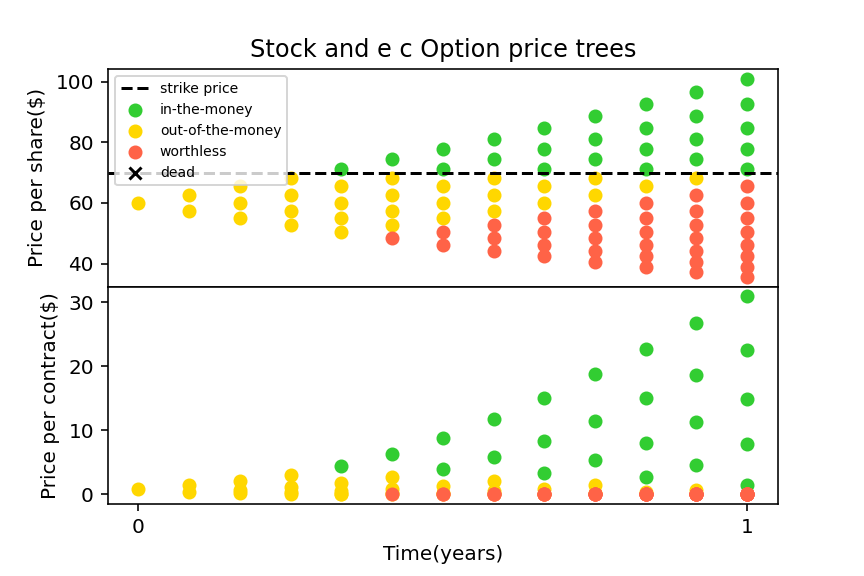

In [2]:
#if you want that the plot is interactive, you need to write the command below before calling plot(T,dt,K,N,opttype1,opttype2,option,stock,dead_time, dead_option, dead_stock):
%matplotlib nbagg

#to ensure you do not violate no-arbitrage conditon when setting your model paramters, use paramters()
#parameters()

T = 1
N = 12
S0 = 60 
sigma = 0.15
r = 0.01 
K = 70 
opttype1 = 'e'
opttype2 = 'c'

binomial_model(T,N,S0, sigma, r, K,opttype1,opttype2)
print('The fair price of your {} {} option is:'.format(opttype1,opttype2), option[0][0])
tree_plot(T,K,N,opttype1,opttype2,option,stock,dead_time, dead_option, dead_stock)

See that stock price forms a tree: the price can only move to the node which is immedietally above or below in the next time step. However, the tree loses up-down symmetry because the price cannot lie below 0 $\$ $, while has not maximum value. Nodes **in the money** are the ones that are **above** the **strike** price, while nodes **out of the money** are the ones which are **below** the **strike** price but still have a path to raise above it. **Worthless** nodes are the ones where the premium is zero, that is, **there is not a path to raise above the strike**. See that worthless nodes for each time step in the stock price tree collapse in just one node in the option tree. That is the reason why option tree has less nodes. Note that you can **change plot size at will bottom right**.

Now, let us study how the option premium ($V_0$) depends on the different parameters for each option type. Run the cell below to see plots.

<IPython.core.display.Javascript object>


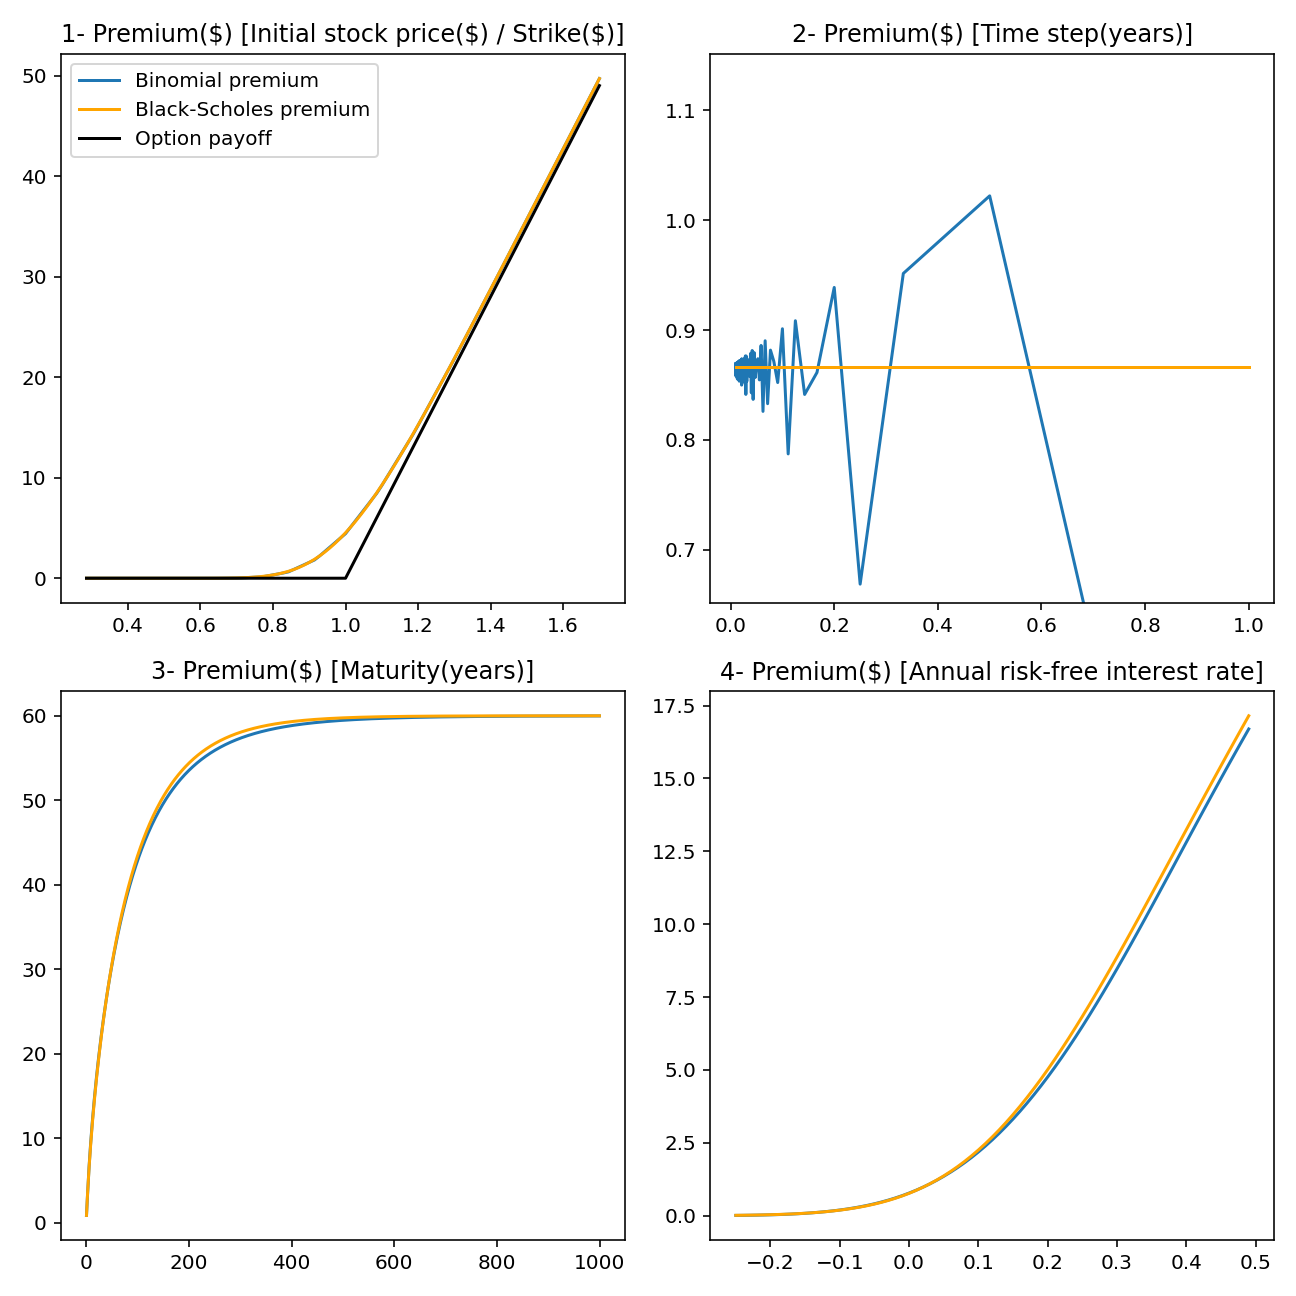

In [3]:
subplots(opttype1,opttype2,S0, K, T, r, sigma,N)

Firstly, we plot how the premium varies with $S_0/K$, with $K$ fixed. Furthermore, we plot the option payoff at time zero in the same graph, so we can compare both magnitudes. There you can see that $V_0 \geq S_N-K$. Otherwise, money today would be less valuable than tomorrow, what contradicts **time preference** logic. That is, fixing the rest of variables (eg. Ceteris paribus) **people always prefer receiving money now rather than tomorrow**, assuming the same amount is received. On the other hand, the **call is in-the-money for $S_n/K > 1$. Consequently, the payoff starts to grow and so does the premium**. Therefore, one should buy the option when it is out-of-the money, because the premium is very low and profitability may be very high. 

Secondly, we plot how the premium varies with the size of time steps ($dt$). In this case, we want to show how our simple **binomial model matches perfectly the well-known Black-Scholes model when the time step is sufficiently diminished**. One can check this using our Python functions increasing $N$ for a given $T$.

Thirdly, we represent how the premium varies the maturity. See that **for very long maturities, the premium converges to the initial stock price^**. One can understand this result heuristically: when maturity is increased, because the option price is bottom-bounded, there are far more paths above the strike than below. Therefore, for the majority of nodes, the strike price is comparatively very low. In the limit, $K \rightarrow 0$ and hence $V_0 \rightarrow S_0$.

Finally, we study how the premium depends on the annual risk-free interest rate. Indeed, this would be very similar to annual interest paid by the standard risk-free assets: US public debt bonds (which is largely influenced by the lending and deposit rates set by the US central bank, the Federal Reserve). This graph might be quite confusing at first: generally, the higher the rates, the lower the risky assets performance, particulary, stocks. As option prices depend on stock prices, one might expect that the premium sinks with tha rise of rates. Nevertheless, **option premium is a Martingale under the risk-neutral probability. This means that option payoffs grows as a bond. Therefore, the higher the rates, the higher the premium**. 

Below you can see an interactive plot that allows you to study how volatility, interest rate and maturity influence the $V_0(S_0/K)$ plot. Run the cell below to animate the plot.

<IPython.core.display.Javascript object>


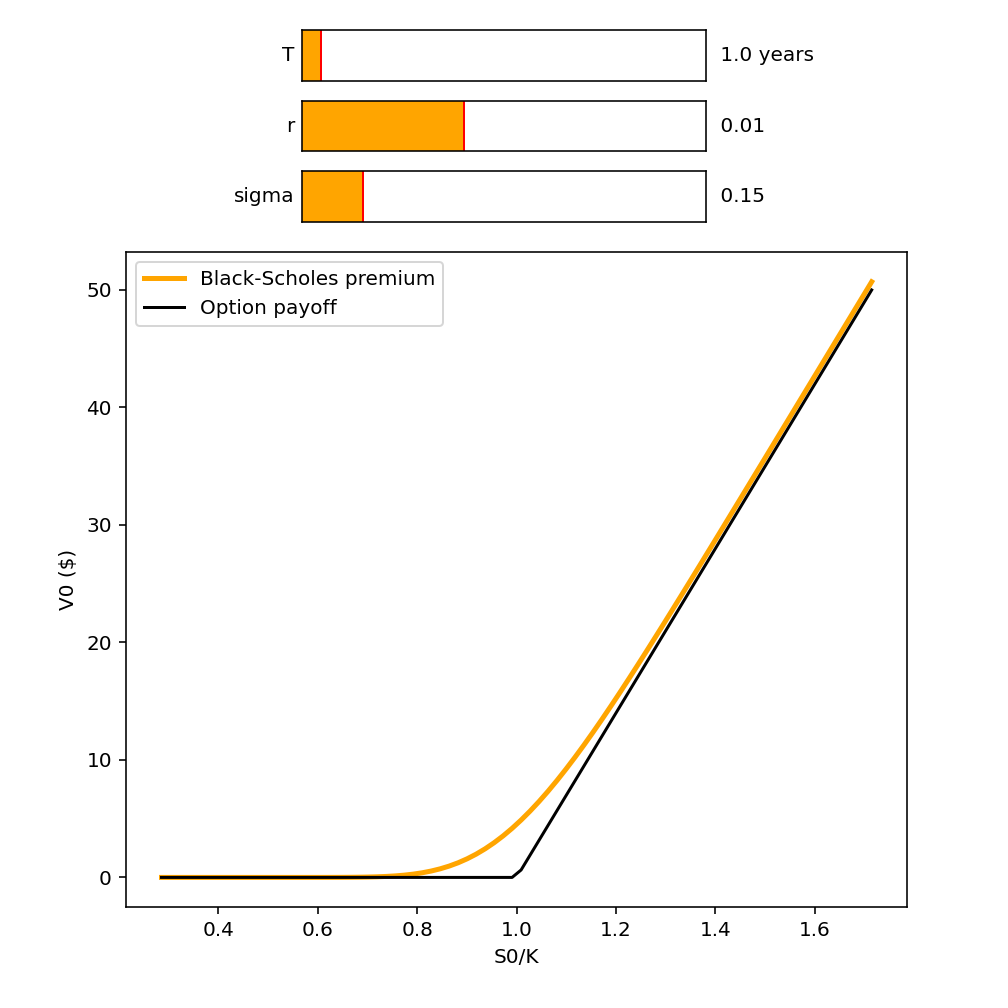

In [4]:
interactive_plot(K,T,r,sigma,opttype2)

Note that if $r<0$, $V_0<S_N - K$. That means that money today is less valuable that the same amount tomorrow, which is unrealistic. Nonethless, you can check that this situation can be reverted by simply rising volatility, since this adds uncertainty to money in the future and hence makes current value rise, comparatively. On the other hand, it is remarkable that one will never violate time preference logic by diminishing the option maturity, but the premium will converge to the payoff in the limit. 

### 5.2 American calls

The holder has the right to buy the stock for $ K\$ $ at any time step until maturity, $T$. Hence, the payoff is: $S_n-K$.

The fair price of your a c option is: 0.8716235548738193


<IPython.core.display.Javascript object>


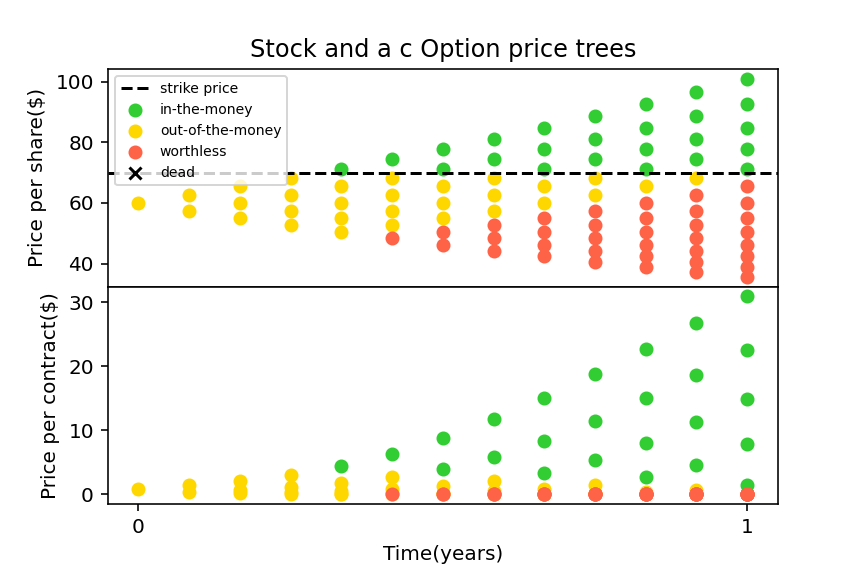

In [5]:
%matplotlib nbagg
#parameters()
T = 1 
N = 12
S0 = 60 
sigma = 0.15
r = 0.01 
K = 70 
opttype1 = 'a'
opttype2 = 'c'

binomial_model(T,N,S0, sigma, r, K,opttype1,opttype2)
print('The fair price of your {} {} option is:'.format(opttype1,opttype2), option[0][0])
tree_plot(T,K,N,opttype1,opttype2,option,stock,dead_time, dead_option, dead_stock)

Note that for a stock that pays no dividend, a European and an American call ought to be equivalent. An **American** option is **never worth less** than an otherwise identical (same underlying, same expiration date, same strike) **European** option, because it gives you the same rights plus more. Hence, the **difference** between American and European price equals the value of the **right to early exercise**.

However, very often the right to early exercise is not worth much, and American and European option price is almost the same. When you choose to exercise an option and there is still time left to expiration, you are giving up the option's remaining time value.

When **pricing an American** option, at **each step one checks whether exercising the option is profitable** at that moment (intrinsic value is greater than calculated option price at that step, or in other words, time value is negative).
When pricing a European option, one simply does not do these checks.

Remarkably, **Black-Scholes formula** can only be applied to **non-dividend European** options. In case one wants to price American options, numerical methods are needed for solving a partial differential equation. Nonetheless, the binomial model suceeds at pricing all vanilla options and yields same results as Black-Scholes if $\Delta t$ is small enough. 

For instance, consider an option with strike $K=70\,\$ $ we are at half maturity time, where $S_{0.5} = 77.8\,\$ $ and $V_{0.5} = 8.7\,\$ $: 

i) Option exercising would yield $S_{0.5}-K = 7.8\,\$ $

ii) Selling the option in the options market would yield $ V_{0.5} = 8.7 \$ $.

Therefore, **it does not make sense to exercise the option, since it is more valuable alive than dead**. On the contrary, if the option payoff was greater than the option price, one would **exercise the option** (in case it was American) and would have a **dead node**.  

As it is shown in the example above, there are **no dead nodes for American calls**, that is, the **most profitable strategy** is to **hold** the option until maturity is reached, **as if it was European**. That is the reason why their **premium is the same**.  

On the other hand, below you can see how the premium behaves when we change parameters values. As the Black-Scholes formula only applies to European options, the premium according to that model cannot be represented. 

<IPython.core.display.Javascript object>


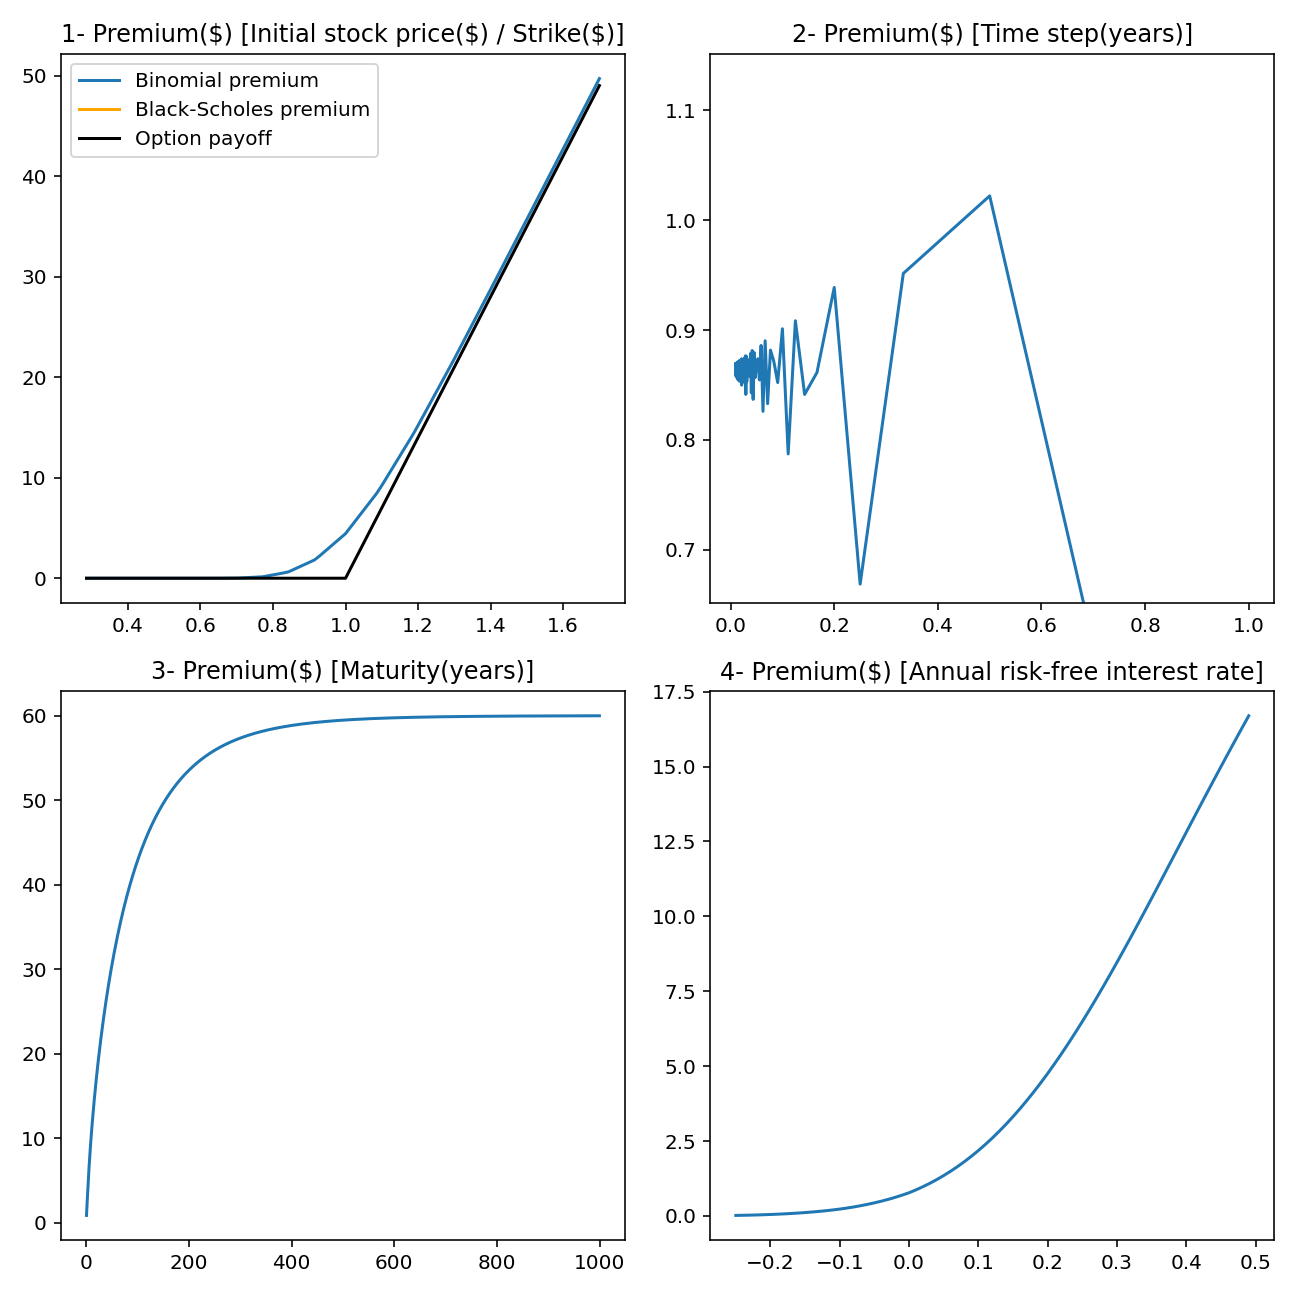

In [6]:
subplots(opttype1,opttype2,S0, K, T, r, sigma,N)

Premium behaviour is the same as in European calls. However, you can prove using ``binomial_model(T,N,S0, sigma, r, K,opttype1,opttype2)`` and ``tree_plot(T,K,N,opttype1,opttype2,option,stock,dead_time, dead_option, dead_stock)`` that if $r<0$ and hence $V_0<S-n - K$ dead nodes appear in American calls. In this situation, time preference is inverted, what means that money tomorrow is preferred to money today. Consequently, option payoff may be greater than the premium in some nodes (dead) and the contract is broken by the holder. 


### 5.3 European puts 

The holder has the right the sell to stock for the strike at maturity. Hence, the option payoff is: $K-S_N$.

The fair price of your e p option is: 0.173860036936645


<IPython.core.display.Javascript object>


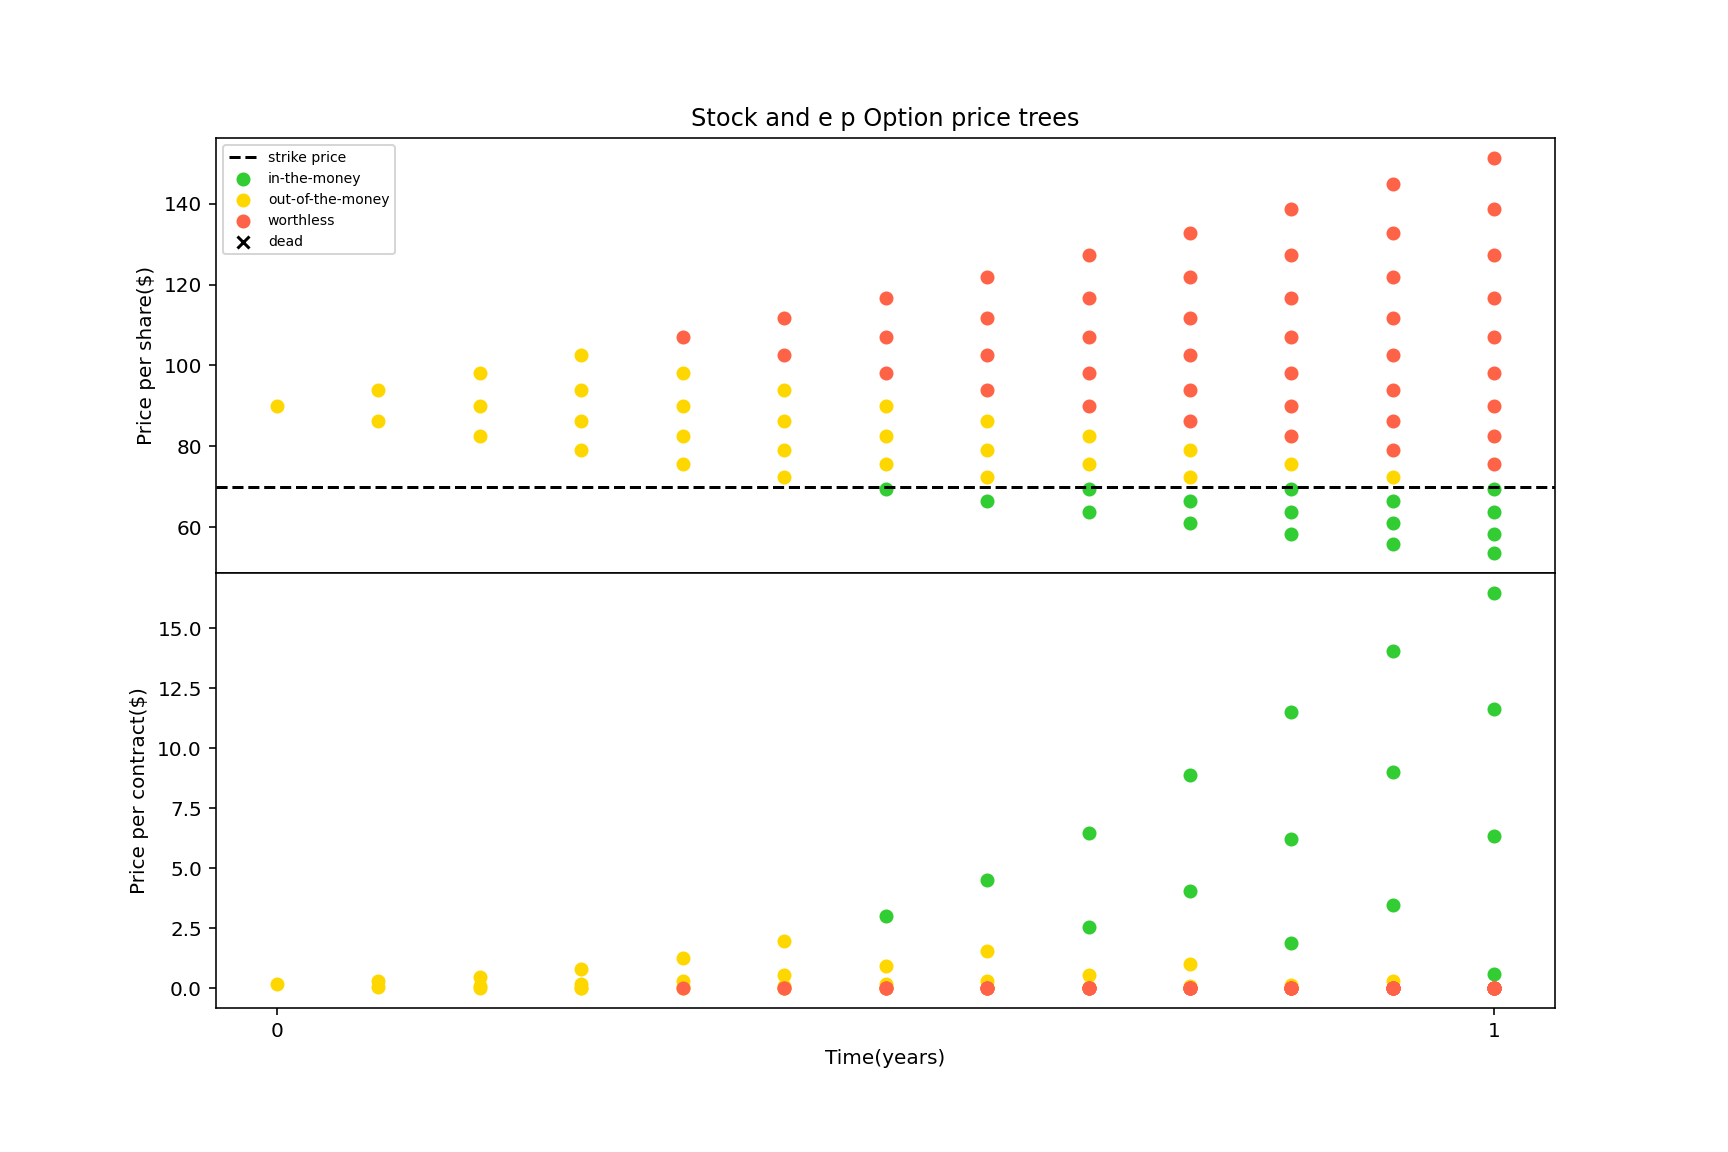

In [7]:
%matplotlib nbagg
#parameters()
T = 1 
N = 12
S0 = 90 
sigma = 0.15
r = 0.01 
K = 70 
opttype1 = 'e'
opttype2 = 'p'

binomial_model(T,N,S0, sigma, r, K,opttype1,opttype2)
print('The fair price of your {} {} option is:'.format(opttype1,opttype2), option[0][0])
tree_plot(T,K,N,opttype1,opttype2,option,stock,dead_time, dead_option, dead_stock)

In this case, see that the option is **in the money when the option price is below the strike**, since now the holder has the right to sell the option for the strike at maturity. 

On the other hand, it is again very interesting to study premium dependencies with the parameter values. 

In the first case, we get opposite results in comparison to calls. Now $V_0 \leq S_n - K$ when the option is **in the money ($S_n/K < 1$)**. Otherwise, time preference logic would be violated. The right of selling the stock today (given an American option) means earning money today, which is preferred to receiving the payoff in the future. Again, time preference needs to hold.

**Put-call parity** states that simultaneously holding a short European put and long European call of the same class will deliver the same return as holding one forward contract on the same underlying asset, with the same expiration, and a forward price equal to the option's strike price.

**If the prices of the put and call options diverge so that this relationship does not hold, an arbitrage opportunity exists**. This means that sophisticated traders can theoretically earn a risk-free profit selling the expensive side of the equation and buying the cheap one. Such opportunities are uncommon and short-lived in liquid markets.

In continuous time, the put-call parity equation is: 

$$P_t + S_t = C_t + Ke^{-r(T-t)},$$

where $P_t, C_t$ and $S_t$ are the current prices for a put, a call and the underlying, respectively. 

As for how the premium varies with the maturity, the **premium of the put converges to zero for large maturities**. As the maturity increases, the strike is lower and lower in comparison to the majority of possible stock prices. However, stock prices need to be below the strike in order the put to be in the money. Thus, in the limit the option is worthless, since the vast majority of paths lead to prices above the strike at maturity. 

Regarding the premium dependance on the risk-free rate, the opposite to calls happens again. Because the option price is a martingale under the risk-neutral probability, it stinks with $r$. This is due to the change in the payoff function for put options: $K-S_N$ instead of $S_N - K$. In origin, is the **stock price what bahaves as a martingale under risk-neutral probability and, hence, so does the premium. Although it does not make sense to price stocks using $\widetilde{P}$, it does for pricing derivatives, since they derive they value from their ability to hedge positions. When holding a put, being in-the-money means $S_n<K$. Then, as $S_n$ falls with declining $r$, so does the premium.**

<IPython.core.display.Javascript object>


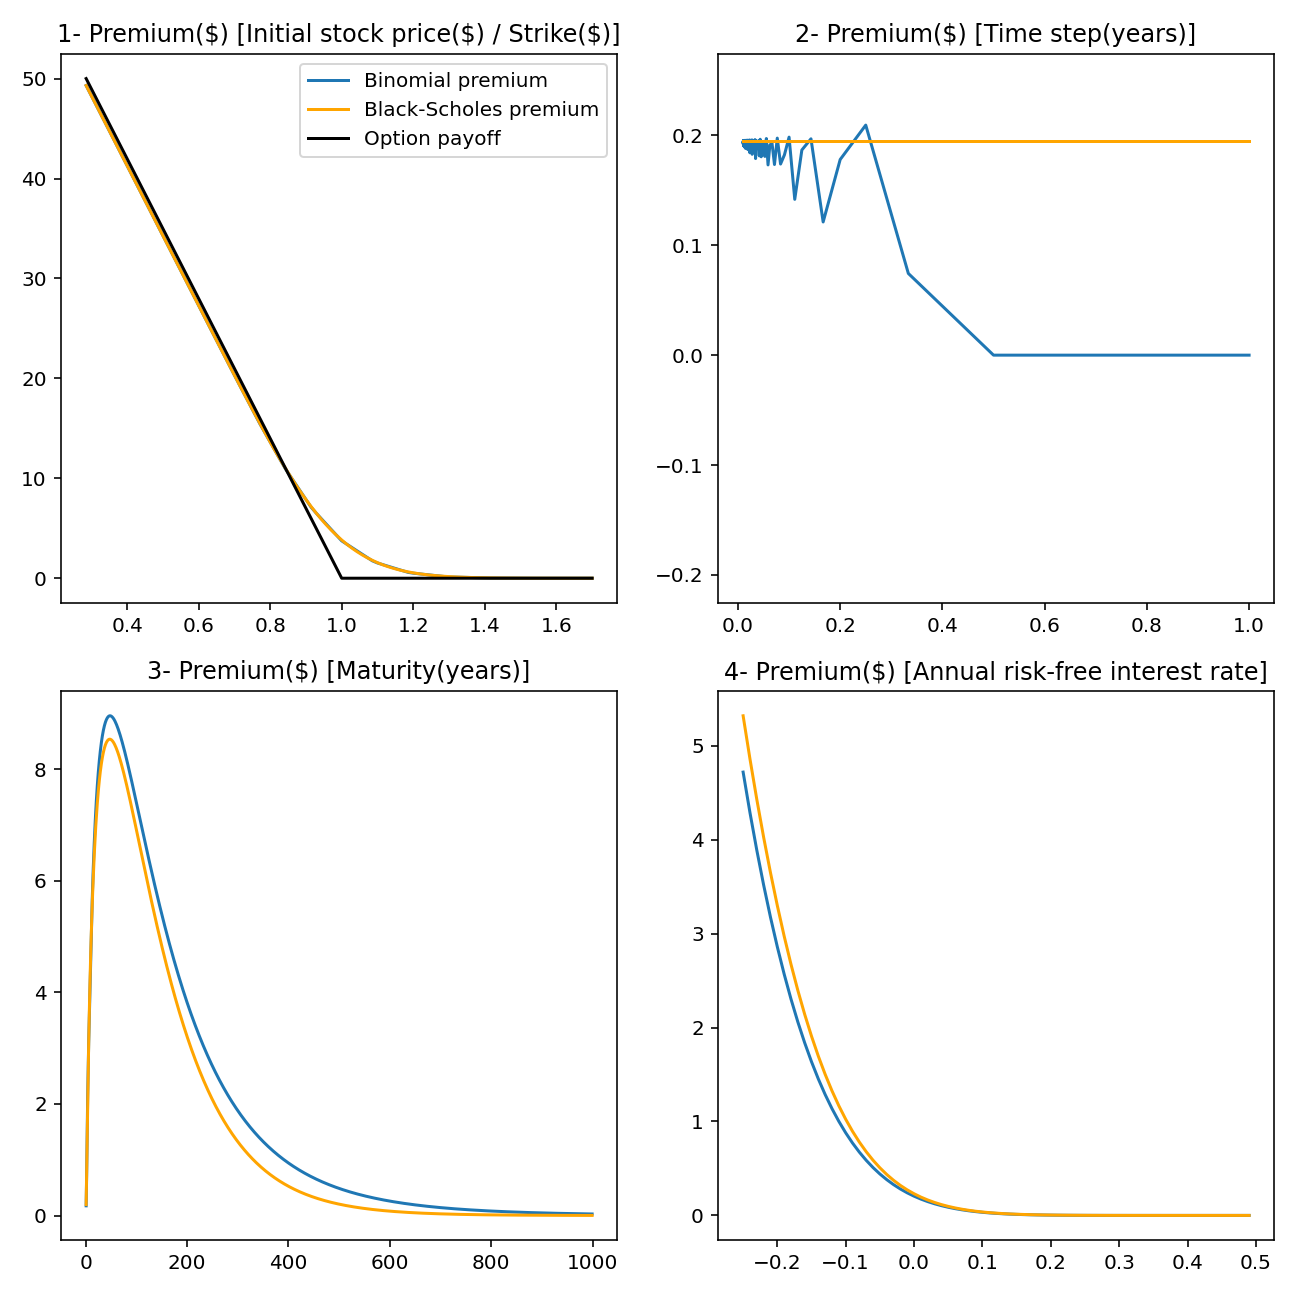

In [8]:
subplots(opttype1,opttype2,S0, K, T, r, sigma,N)

Again, you can see below an interactive plot that may help you assimilate premium dependencies with model parameters.

<IPython.core.display.Javascript object>


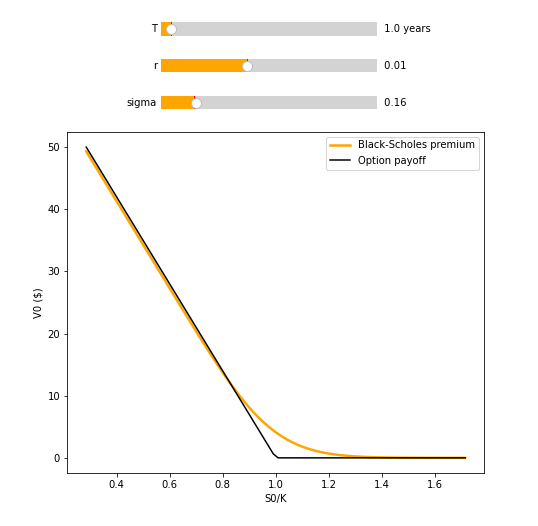

In [20]:
interactive_plot(K,T,r,sigma,opttype2)

As happened with calls, if $r<0$ then $V_0>S_n-K$ and time preference is inverted. However, see that with puts one cannot revert this situation rising volatility. This fact is telling us that something different happens with American puts. Note that although $r>0$ there is a region $0.8<S_0/K<1.0$ where $V_0>S_n-K$. Nevertheless, then $V_0<S_n-K$. In other words, there is always a point where it becomes more profitable to exercise the option (American) than holding it to maturity. Therefore, as long as time preference logic is respected, dead nodes should always appear in American puts.

### 5.4 American puts 

The holder has the option to sell the stock for the strike any time before maturity. The payoff is $K-S_n$.

The fair price of your a p option is: 0.17653199240963977


<IPython.core.display.Javascript object>


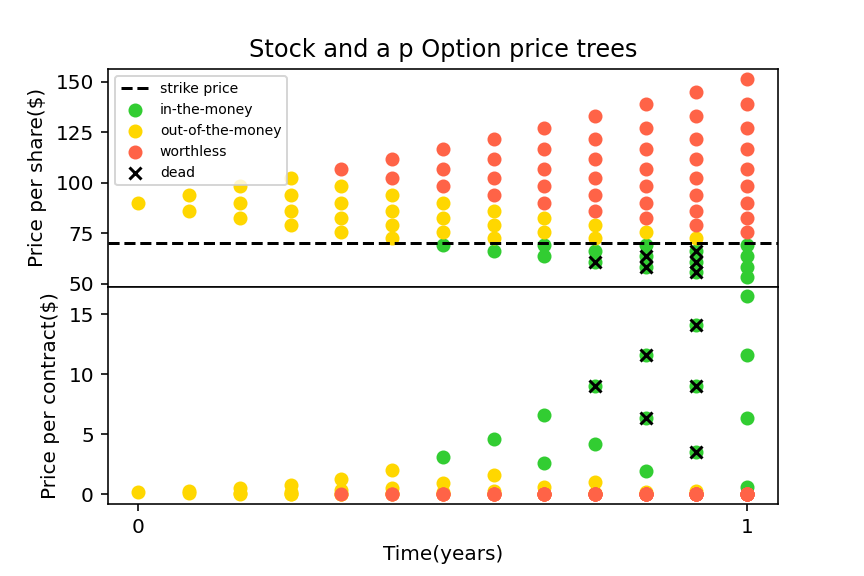

In [9]:
%matplotlib nbagg
#parameters()
T = 1
N = 12
S0 = 90 
sigma = 0.15
r = 0.01 
K = 70 
opttype1 = 'a'
opttype2 = 'p'

binomial_model(T,N,S0, sigma, r, K,opttype1,opttype2)
print('The fair price of your {} {} option is:'.format(opttype1,opttype2), option[0][0])
tree_plot(T,K,N,opttype1,opttype2,option,stock,dead_time, dead_option, dead_stock)

See that **dead nodes** have appeared now, that is, nodes where **it is profitable to execute the option**. The existance of those nodes is the **reason why American puts are more valuable than European**. Nonetheless, dead nodes are not very common in this case and hence the price only differs in $0.003\,\$$. Note that nodes in the stock chart valued in $61.0\,\$,63.7\,\$$ and $66.5\,\$$ define the **optimal exercise function**. As an investor, this function tells you when you should break the contract.

<IPython.core.display.Javascript object>


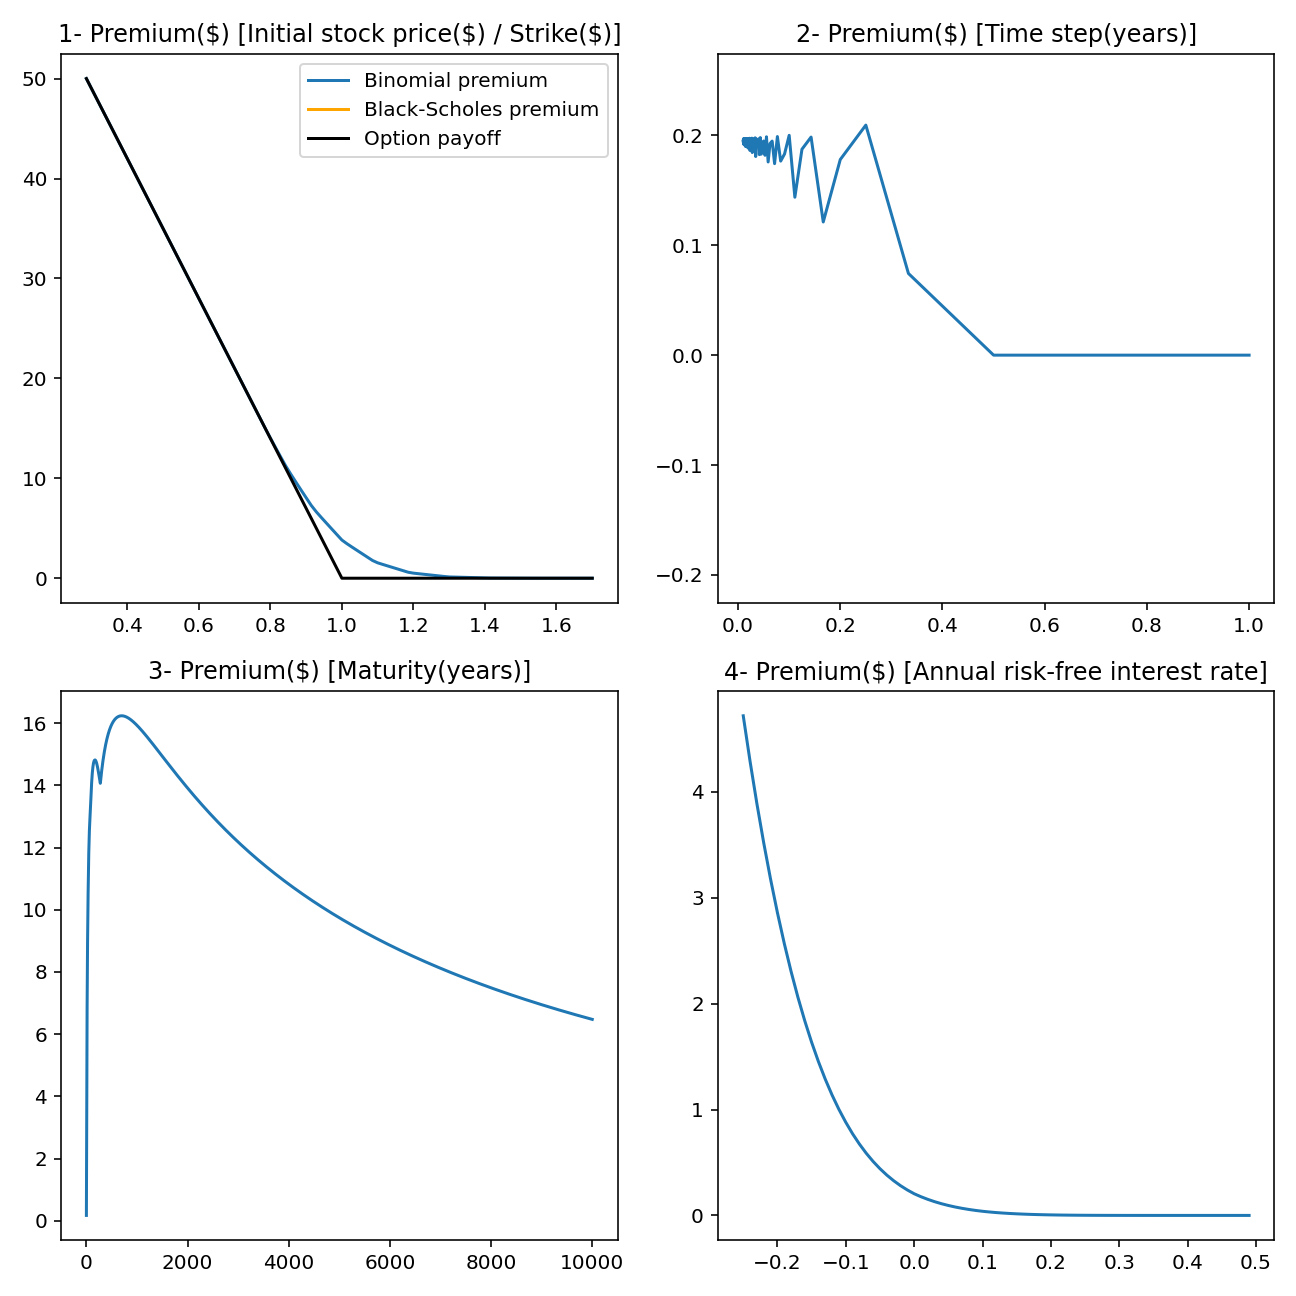

In [10]:
subplots(opttype1,opttype2,S0, K, T, r, sigma,N)

<!-- **American puts'** behaviour is very similar to Europeans' with the exception of $V_0(T)$ plot. On the one hand, it **takes much larger maturites for the premium to converge to zero**. The reason is not other than **dead nodes** existance. Recall American and European valuation differs due to dead nodes. As maturity increases, so does the number of alive and dead nodes, what prevents the premium from falling rapidly to zero. On the other hand, see that something strange happens: before the peak, there is a mini-peak. That is a problem of discretitzation: the optimal price function varies faster than the $\Delta t$ taken for this calculation, in that region. You should be able to prove that this mini-peak vanishes if $\Delta t$ is taken sufficiently small. However, the trade-off will a much higher calculation time. Therefore, the ideal solution would be to implement an adaptative stepsize method. -->


## 6. Test

Finally, you can **test yourself running the cell below**. It will ask you **as many questions as you want**, which you will have to answer **typing in lowercase**. As for numerical questions, answer using **dots and rounding to the penny**. At the end of the test, the code will tell you how many questions you answered correctly and will encourage you to **try again with the ones you failed**. Feel free to use and modify this function (and all the others in this notebook) as much as you want.

Last but not least, I would like to thank you very much for reading this article, I hope that it is as useful for you to understand the basics of option pricing as it has been for me. Needles to say, I am very grateful to Miquel for giving me the opportunity to dive into quantitative finance and for his help and support during the entire process.

In [11]:
test()

How many questions do you want to answer? 
0

 You got 0/0 points. Revise the article so you can answer correctly the ones you missed:

 You answered correctly all the questions! Keep testing yourself if you want, there are many questions to be answered.
